1.0


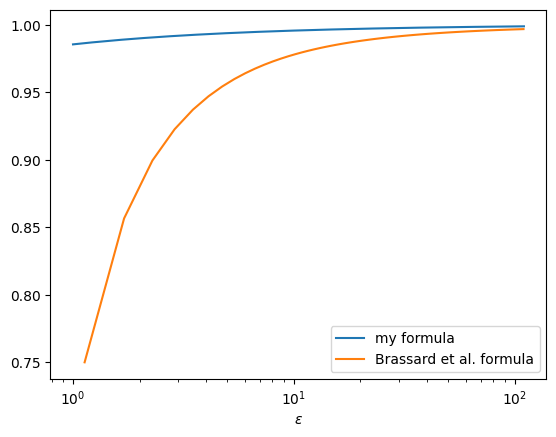

In [74]:
from matplotlib.pylab import plt
import tikzplotlib
import numpy as np

latex = False

#TODO: add actual relation between precision and success probability
# \Pr\left[|\tilde c-c|\leq\varepsilon\right]\geq 1- \frac{1}{\frac{2^{t+1}}{\arcsin\varepsilon}-4}
exp = 8
add_bits = 2
t = exp + add_bits # arbitrary #amount of counting qubits
N = 2**exp # arbitrary
actual_c = 15 # arbitrary
eps_min = np.ceil(np.pi*N*(np.sin(5*2**(-1-t))**2)) #https://www.wolframalpha.com/input?i=0%3C1-1%2F%282%5E%28t%2B1%29*arcsin%28sqrt%28x%2F%28N*pi%29%29%29-4%29%3C1+%3B+solve+for+x
print(eps_min)
eps_max = 110
k_max = 150 # brassard and my plot should have similar max_x, just try it out and set eps_max accordingly
def my_prob_formula(eps):
    return 1-1/(2**(t+1)*np.arcsin(np.sqrt(eps/(N*np.pi)))-4)

def brassard_prob_formula(k):
    return 1-1/(2*k-2)
def brassard_eps_formula(k):
    return 2*np.pi*k*np.sqrt(actual_c*(N-actual_c))/(2**t) + (np.pi**2)*k**2*N/(2**(2*t))

eps = np.linspace(eps_min, eps_max, 500)#logspace why not working?
my_prob = my_prob_formula(eps)

plt.xlabel(r"$\varepsilon$")
if latex:
    # plt.ylabel(r"$\Pr\left[|\tilde c-c|\leq\varepsilon\right]\geq$")
    plt.ylabel(r"$\Pr\left[\text{\enquote{success}}\right]\geq$")
plt.xscale("log")
plt.plot(eps, my_prob, label="my formula")

k = np.linspace(3, k_max, 100)
brassard_eps = brassard_eps_formula(k)
brassard_prob = brassard_prob_formula(k)
plt.plot(brassard_eps, brassard_prob, label="Brassard et al. formula")

if not latex:
    plt.legend()
else:
    print(tikzplotlib.get_tikz_code(axis_height="5cm", axis_width="6cm"))
    print(f"\caption{{absolute error vs. success probability with {add_bits} additional counting bits and $N={N}$}}"+r"\label{fig:basic-qc:precision-vs-success-probability}")

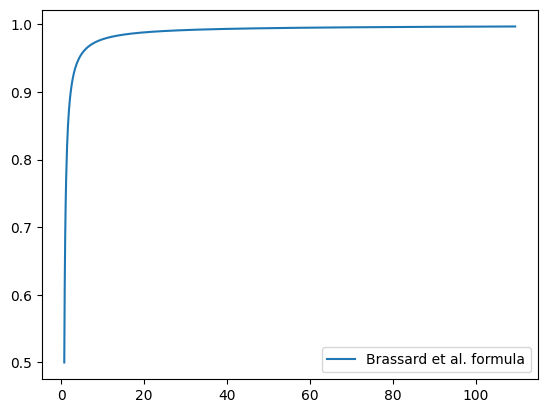

In [ ]:
k = np.linspace(2, k_max, 500)
brassard_eps = brassard_eps_formula(k)
brassard_prob = brassard_prob_formula(k)
plt.plot(brassard_eps, brassard_prob, label="Brassard et al. formula")

if not latex:
    plt.legend()
else:
    print(tikzplotlib.get_tikz_code(axis_height="5cm", axis_width="6cm"))
    print(f"\caption{{Comparison of Brassard et al.'s probability bound (orange) and mine (blue):\\\\ Absolute error vs. success probability with {add_bits} additional counting bits and $N={N}, c={actual_c}$.}}"+r"\label{fig:basic-qc:precision-vs-success-probability-brassard}")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


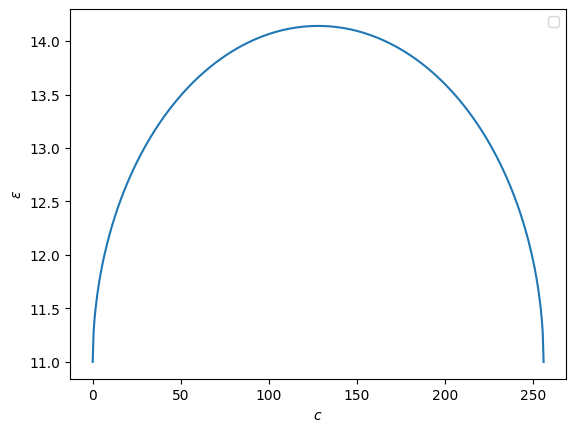

In [4]:
from matplotlib.pylab import plt
import tikzplotlib
import numpy as np

latex = False

N = 2**8 # arbitrary

def brassard_eps_formula_n_halfed(actual_c):
    return 2*np.pi*np.sqrt(actual_c*(N-actual_c))/N + 11

actual_c = np.linspace(0, N, 500)
eps = brassard_eps_formula_n_halfed(actual_c)

plt.ylabel(r"$\varepsilon$")
plt.xlabel(r"$c$")

plt.plot(actual_c, eps)

if not latex:
    plt.legend()
else:
    print(tikzplotlib.get_tikz_code(axis_height="5cm", axis_width="6cm"))
    print(f"\caption{{absolute error vs. success probability with {add_bits} additional counting bits and $N={N}$}}"+r"\label{fig:basic-qc:precision-vs-success-probability}")

% This file was created with tikzplotlib v0.10.1.
\begin{tikzpicture}

\definecolor{chocolate2267451}{RGB}{226,74,51}
\definecolor{dimgray85}{RGB}{85,85,85}
\definecolor{gainsboro229}{RGB}{229,229,229}
\definecolor{steelblue52138189}{RGB}{52,138,189}

\begin{axis}[
axis background/.style={fill=gainsboro229},
axis line style={white},
height=5cm,
tick align=outside,
width=6cm,
x grid style={white},
xlabel=\textcolor{dimgray85}{\(\displaystyle c\)},
xmajorgrids,
xmin=-3138.89859719439, xmax=68806.2332665331,
xtick pos=left,
xtick style={color=dimgray85},
y axis line style={draw=none},
y grid style={white},
ylabel=\textcolor{dimgray85}{Runtime},
ymajorgrids,
ymajorticks=false,
ymin=-271.110300002761, ymax=6797.84237315622,
ytick style={color=dimgray85}
]
\addplot [semithick, chocolate2267451]
table {%
131.334669338677 117.351771284661
262.669338677355 165.960466519273
394.004008016032 203.259230223235
525.338677354709 234.703542569321
656.673346693387 262.406537872509
788.008016032064 287.

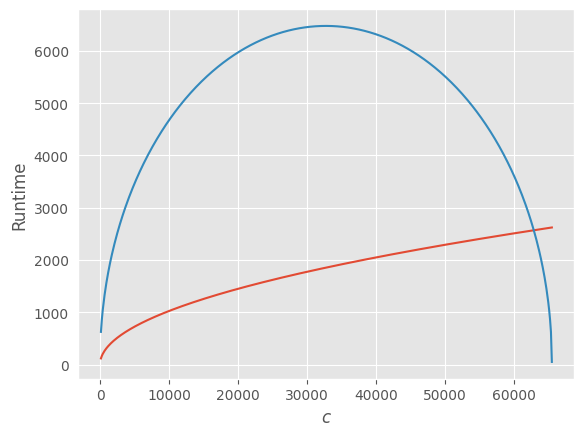

In [25]:
from matplotlib.pylab import plt
import tikzplotlib
import numpy as np

# plt.clf()

latex = False or True

# plt.style.use("ggplot")

N = 2**16 # arbitrary
eps = 25 # arbitrary

def brassard_rt_formula_unoptimized(actual_c):
    return np.sqrt(actual_c*N)/eps

def brassard_rt_formula_optimized(actual_c):
    # \sqrt{\frac{N}{\floor{\epsilon}+1}}+\sqrt{\frac{c(N-c)}{\floor{\epsilon}+1}}
    epsfp = np.floor(eps)+1
    return np.sqrt(N/epsfp)+np.sqrt(actual_c*(N-actual_c)/(epsfp))

actual_c = np.linspace(0, N, 500)[1:]
rt_unopt = brassard_rt_formula_unoptimized(actual_c)
rt_opt = brassard_rt_formula_optimized(actual_c)

plt.ylabel(r"Runtime")
#remove y axis numbers and ticks
# plt.gca().axes.get_axis().set_yticklabels([' '])
plt.gca().axes.get_yaxis().set_ticks_position('none')


plt.xlabel(r"$c$")

plt.plot(actual_c, rt_unopt, label="unoptimized")
plt.plot(actual_c, rt_opt, label="optimized")

if not latex:
    plt.legend()
else:
    print(tikzplotlib.get_tikz_code(axis_height="5cm", axis_width="6cm", extra_axis_parameters=["y axis line style={draw=none}"]))

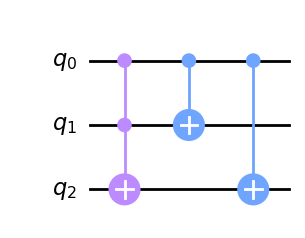

In [1]:
import qiskit as qk


# input bits a, b, c
# output bits a, a xor b xor c, a and b and c
matrix = [
    # 000 -> 000
    [1, 0, 0, 0, 0, 0, 0, 0], 
    # 001 -> 010
    [0, 0, 1, 0, 0, 0, 0, 0],
    # 010 -> 010
    
]


In [8]:
from matplotlib.pylab import plt
import tikzplotlib
import numpy as np

latex = False

def get_hoeff_graph(samples):
    eps_min = 0.0001
    eps_max = 0.1
    def hoeffding_prob_formula(eps):
        return 1-2*np.exp(-eps**2*samples/2)

    eps = np.logspace(np.log10(eps_min), np.log10(eps_max), 500)#logspace why not working?
    hoeffding_prob = hoeffding_prob_formula(eps)

    plt.xlabel(r"$\varepsilon$")
    if latex:
        # plt.ylabel(r"$\Pr\left[|\tilde c-c|\leq\varepsilon\right]\geq$")
        plt.ylabel(r"$\Pr\left[\text{\enquote{success}}\right]\geq$")
    plt.xscale("log")
    plt.plot(eps, hoeffding_prob, label=f"{samples} samples")

    if not latex:
        plt.legend()
        
def make_single_hoeff_graph(samples):
    get_hoeff_graph(samples)
    if latex:
        print(\
            tikzplotlib.get_tikz_code(axis_height="5cm", axis_width="6cm") + \
            r"\caption{absolute error vs. minimal success probability with "+\
            f"{samples} samples." +\
            r"}\label{fig:basic-qc:precision-vs-success-probability:"f"{samples}"+"}"\
        )
    else:
        plt.show()

    plt.clf()

colors = [
    "crimson2143940",
    "darkgray176",
    "darkorange25512714",
    "forestgreen4416044",
    "mediumpurple148103189",
    "sienna1408675",
    "steelblue31119180",
]
def make_multi_hoeff_graph(sampless):
    for i, samples in enumerate(sampless):
        get_hoeff_graph(samples)
    samples_str = ",".join(['{\color{'+colors[i]+'}'+str(samples)+'}' for i, samples in enumerate(sampless)])
    if latex:
        print(\
            r'\
            \definecolor{steelblue31119180}{RGB}{31,119,180}\
            \definecolor{darkorange25512714}{RGB}{255,127,14}\
            \definecolor{forestgreen4416044}{RGB}{44,160,44}\
            \definecolor{crimson2143940}{RGB}{214,39,40}\
            \definecolor{mediumpurple148103189}{RGB}{148,103,189}\
            \definecolor{sienna1408675}{RGB}{140,86,75}\
            \definecolor{darkgray176}{RGB}{176,176,176}\
            '+\
            tikzplotlib.get_tikz_code(axis_height="5cm", axis_width="6cm") + \
            r"\caption{absolute error vs. minimal success probability with "+\
            f"{samples_str} samples." +\
            r"}\label{fig:basic-qc:precision-vs-success-probability:"f"{samples}"+"}"\
        )
    else:
        plt.show()

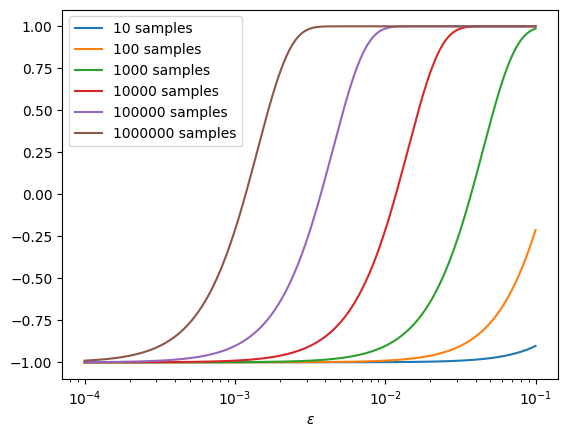

In [9]:
make_multi_hoeff_graph([10, 100, 1000, 10000, 100000, 1000000])

/var/folders/qf/74vn0ttx5nv13rhhrl9mpt_80000gp/T/ipykernel_72133/1954983224.py:18: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(N/epsfp)+np.sqrt(actual_c*(N-actual_c)/(epsfp))


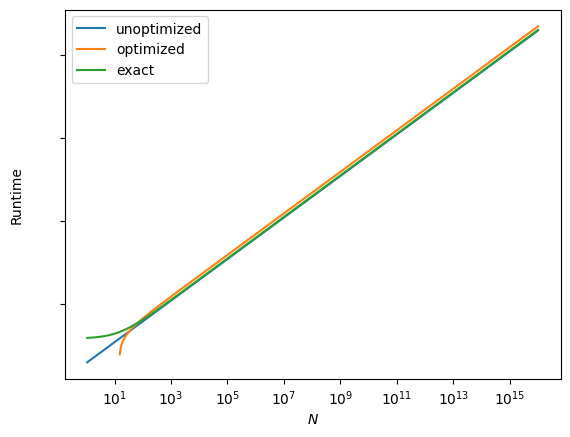

In [6]:
from matplotlib.pylab import plt
import tikzplotlib
import numpy as np

# plt.clf()

latex = False

actual_c = 15 # arbitrary
eps = 0.35 # arbitrary

def brassard_rt_formula_unoptimized(N):
    return np.sqrt(actual_c*N)#/(eps)

def brassard_rt_formula_optimized(N):
    # \sqrt{\frac{N}{\floor{\epsilon}+1}}+\sqrt{\frac{c(N-c)}{\floor{\epsilon}+1}}
    epsfp = np.floor(eps)+1
    return np.sqrt(N/epsfp)+np.sqrt(actual_c*(N-actual_c)/(epsfp))

def brassard_rt_formula_exact(N):
    # \sqrt{\frac{N}{\floor{\epsilon}+1}}+\sqrt{\frac{c(N-c)}{\floor{\epsilon}+1}}
    epsfp = np.floor(eps)+1
    return np.sqrt((actual_c+1)*(N-1+actual_c))


N = np.logspace(0, 16, 500)[1:]
rt_unopt = brassard_rt_formula_unoptimized(N)
rt_opt = brassard_rt_formula_optimized(N)
rt_exact = brassard_rt_formula_exact(N)

plt.ylabel(r"Runtime")
#remove y axis numbers and ticks
plt.rcParams.update({'ytick.right': False})
plt.yticks(color='w')

plt.xlabel(r"$N$")
plt.xscale("log")
plt.yscale("log")

plt.plot(N, rt_unopt, label="unoptimized")
plt.plot(N, rt_opt, label="optimized")
plt.plot(N, rt_exact, label="exact")

if not latex:
    plt.legend()
else:
    print(tikzplotlib.get_tikz_code(axis_height="5cm", axis_width="6cm", extra_axis_parameters=["ytick style={draw=none}","yticklabels={,,}"]))

In [7]:
import random

# zufallszahl 1-3
random.randint(1, 3)

3